<h1>Partial Differential Equations (PDEs) - Heat Equation</h1>
<h4> The goal is to pre-process the time-series data by smoothing it (removing noise) before feeding it into a ML model to help the algo to converge</h4> 

In [16]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
import yfinance as yf

<h4>Simple explicit finite difference method</h4>
<h5>First-order method in time, second-order centred
    difference approximation in space</h5>

$δ_tP(x,t) = δ_xxP(x,t)$<br>
$P(0,t) = p(0)$<br>
$P(n,t) = p(n)$<br>
$P(x,0) = p(x)$<br>

<p>Without showing all the subsitutions coming from the approximation of the derivatives of</p>

$δ_tP$ <p> and</p> $δ_{xx}$

<p> we are going to solve directly for this </p>

$P_{r,s+1}$ = $k$($P_{r-1,s} + P_{r+1,s}) + P_{r,s}(1-2k)$

<p> where the time-step k is between 1 and 0, with conversion where k <= 1/2 </p>

In [5]:
def explicit_heat_smooth(prices: np.array, t_end: float = 3.0):
    '''
    The prices are fixed at the end-points, so the interior is smoothed.
    Parameters
    ----------
    prices : np.array
        The price to smoothen
    t_end : float
        The time at which to terminate the smootheing (i.e. t = 2)
        
    Returns
    -------
    P : np.array
        The smoothened time-series
    '''
    
    k = 0.1 # Time spacing
    
    # Set up the initial condition
    P = prices
    
    t = 0
    while t < t_end:
        # Solve the finite difference scheme for the next time-step
        P = k*(P[2:] + P[:-2]) + P[1:-1]*(1-2*k)
        
        # Add the fixed boundary conditions since the above solves the interior
        # points only
        P = np.hstack((
            np.array([prices[0]]),
            P,
            np.array([prices[-1]]),
        ))
        t += k

    return P

<h5>Below the graphical representation of the explicit_heat_smooth function on stock prices</h5>

[*********************100%***********************]  1 of 1 completed


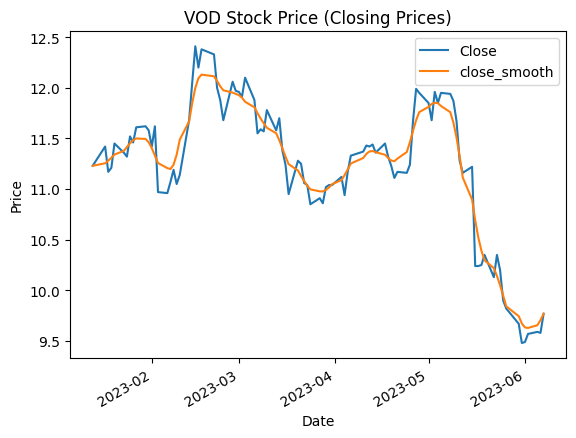

In [20]:
ticker = 'VOD'

df = yf.download(ticker)
df = df[-100:]

df.loc[:,'close_smooth'] = explicit_heat_smooth(
    df.loc[:,'Close'].values, 
    t_end = 3
)

df.plot(
    y = ['Close', 'close_smooth'],
    xlabel = 'Date',
    ylabel = 'Price',
    title = f'{ticker} Stock Price (Closing Prices)',
);

<h5>Comparing it with an EMA, we can see that we avoid the lag</h5>

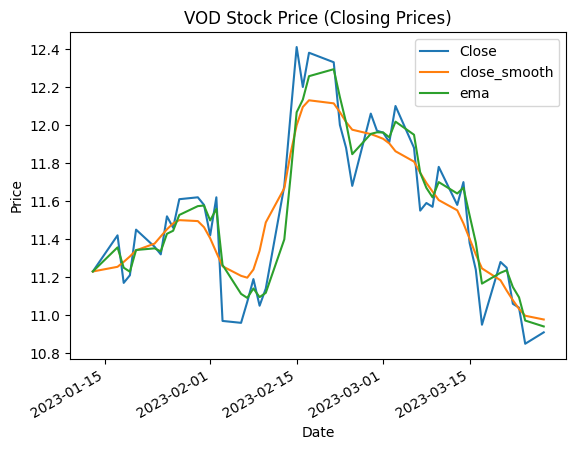

In [26]:
df['ema'] = df['Close'].ewm(com=1).mean()

df[0:50].plot(
    y = ['Close', 'close_smooth','ema'],
    xlabel = 'Date',
    ylabel = 'Price',
    title = f'{ticker} Stock Price (Closing Prices)',
);